We will consider 4 exclusive categories:

height_brick, height_plate, height_arch, hight_roof, height_other

shape_square, shape_round, shape_corner

long_1, long_2, long_3, long_4, long_6, long_8, long_10, long_12

short_1, short_2, short_4, short_6, short_8

In [1]:
import pandas as pd
import generate_image_lists as gil

In [2]:
img_list, img_labels = gil.get_white_images_labels()

In [79]:
easy_labels = [ 
               'angular_brick_1x1', 'arch_1x3', 'brick_1x1', 'brick_1x2', 'brick_1x3', 'brick_1x4', 'brick_1x6', 'brick_1x8', 
               'brick_2x2', 'brick_2x3', 'brick_2x4', 'brick_2x6', 'plate_1x1', 'plate_1x10', 'plate_1x2', 'plate_1x3', 'plate_1x4', 
               'plate_1x6', 'plate_1x8', 'plate_2x12', 'plate_2x2', 'plate_2x3', 'plate_2x4', 'plate_2x6', 'plate_2x8', 'plate_4x4', 
               'plate_4x6', 'plate_4x8', 'plate_6x10', 'plate_6x6', 'plate_6x8', 'plate_8x8','round_brick_1x1','radiator_grille_1x2',
              ]

hard_label_dict = {
                     'arch_1x6x2':6,'brick_2x2_round':2,'brick_corner_1x2x2':2,'corner_brick_2x2_45_outside':2,
                     'corner_plate_1x2x2':2,'plate_1x1_round':1,'plate_1x1_w_clip_vertical':1,'plate_1x2_w_1_knob':2,
                     'roof_tile_1x2_45':2,'roof_tile_1x2_inv':2,'roof_tile_1x3_25':3,'roof_tile_1x3_25_inv':3,'roof_tile_2x2_45':2,
                     'technic_brick_1x1_w_hole':1,'technic_brick_1x2_w_hole':2,
                  }

def gen_height_label( 
                        inp_df, 
                        inp_labels 
                    ):
    
    # Get the labels for each index
    label_list = [ inp_labels[img_name] for img_name in inp_df['img_path'].values]

    # Locate indexes containing label, and one hot encode
    brick_list = [ 1 if ('brick' in label) else 0 for label in label_list ]
    plate_list = [ 1 if ('plate' in label) else 0 for label in label_list ]
    arch_list  = [ 1 if ('arch'  in label) else 0 for label in label_list ]
    roof_list  = [ 1 if ('roof'  in label) else 0 for label in label_list ]
    
    # Add the height info
    out_df = inp_df.copy()
    out_df['height_brick'] = brick_list
    out_df['height_plate'] = plate_list
    out_df['height_other'] = 1 - out_df[['height_brick','height_plate']].sum(axis=1)

    return out_df

def gen_shape_label( 
                        inp_df, 
                        inp_labels 
                    ):
    
    # Get the labels for each index
    label_list = [ inp_labels[img_name] for img_name in inp_df['img_path'].values]

    
    
    # Locate indexes containing label, and one hot encode
    round_list  = [ 1 if ('round'  in label) else 0 for label in label_list ]
    corner_list = [ 1 if ('corner' in label) else 0 for label in label_list ]

    # Add the height info
    out_df = inp_df.copy()
    out_df['shape_corner'] = corner_list
    out_df['shape_round' ] =  round_list
    out_df['shape_square'] = 1 - out_df[['shape_corner','shape_round']].sum(axis=1)
    
    return out_df

def gen_short_label( 
                        inp_df, 
                        inp_labels 
                    ):
    
    # Get the labels for each index
    label_list = [ inp_labels[img_name] for img_name in inp_df['img_path'].values]

    # Locate indexes containing label, and one hot encode
    x1_list  = [ 1 if ('_1x'  in label) else 0 for label in label_list ]
    x2_list  = [ 1 if ('_2x'  in label) else 0 for label in label_list ]
    x4_list  = [ 1 if ('_4x'  in label) else 0 for label in label_list ]
    x6_list  = [ 1 if ('_6x'  in label) else 0 for label in label_list ]
    x8_list  = [ 1 if ('_8x'  in label) else 0 for label in label_list ]
    
    # Add the height info
    out_df = inp_df.copy()
    out_df['short_1'] = x1_list
    out_df['short_2'] = x2_list
    out_df['short_4'] = x4_list
    out_df['short_6'] = x6_list
    out_df['short_8'] = x8_list

    return out_df

def gen_long_label( 
                        inp_df, 
                        inp_labels 
                    ):
    
    # Get the labels for each index
    label_list = [ inp_labels[img_name] for img_name in inp_df['img_path'].values]

    # Locate indexes containing label, and one hot encode
    x1_list  = [ 1 if ('x1'  == label[-2:] ) else 0 for label in label_list ]
    x2_list  = [ 1 if ('x2'  == label[-2:] ) else 0 for label in label_list ]
    x3_list  = [ 1 if ('x3'  == label[-2:] ) else 0 for label in label_list ]
    x4_list  = [ 1 if ('x4'  == label[-2:] ) else 0 for label in label_list ]
    x6_list  = [ 1 if ('x6'  == label[-2:] ) else 0 for label in label_list ]
    x8_list  = [ 1 if ('x8'  == label[-2:] ) else 0 for label in label_list ]
    x10_list = [ 1 if ('x10' == label[-3:] ) else 0 for label in label_list ]
    x12_list = [ 1 if ('x12' == label[-3:] ) else 0 for label in label_list ]

    # Add the height info
    out_df = inp_df.copy()
    out_df['long_1' ] = x1_list
    out_df['long_2' ] = x2_list
    out_df['long_3' ] = x3_list
    out_df['long_4' ] = x4_list
    out_df['long_6' ] = x6_list
    out_df['long_8' ] = x8_list
    out_df['long_10'] = x10_list
    out_df['long_12'] = x12_list

    # For special cases, handle uniquely
    for ind in out_df.index.values:
                        
        if ( 
             inp_labels[ 
                        out_df.loc[ind,'img_path']
                       ] in hard_label_dict.keys()
           ):
            true_length = hard_label_dict[
                                            inp_labels[
                                                        out_df.loc[ind,'img_path']
                                                      ]
                                         ]
            # Reset all long indexes
            for col in  [ col for col in exp_df.columns.values if ('long' in col) ]:
                out_df.loc[ind,col] = 0
            out_df.loc[ind,'long_'+str(true_length)] = 1
    
    return out_df

# Pass an input dataframe with img_path, labels in dict for 
#  img_path values, and will return labels 1 hot encoded
def gen_all_labels( 
                        inp_df, 
                        inp_labels 
                  ):
    
    out_df = gen_height_label( inp_df, inp_labels )
    out_df = gen_shape_label ( out_df, inp_labels )
    out_df = gen_short_label ( out_df, inp_labels )
    out_df = gen_long_label  ( out_df, inp_labels )
    
    return out_df

In [86]:
def gen_white_labels():
    
    # Get the images with a white background, and their labels
    img_list, img_labels = gil.get_white_images_labels()
    
    # Create df with image paths
    my_frame = pd.DataFrame()
    my_frame['img_path'] = img_list
    
    # Get human readable labels
    hl_list = []
    for img in img_list:
        hl_list.append( img_labels[img] )
    my_frame['human_label'] = hl_list

    return gen_all_labels( my_frame, img_labels )

def gen_dirty_labels():
    
    # Get the images with a white background, and their labels
    img_list, img_labels = gil.get_white_images_labels()
    
    # Create df with image paths
    my_frame = pd.DataFrame()
    my_frame['img_path'] = img_list
    
    # Get human readable labels
    hl_list = []
    for img in img_list:
        hl_list.append( img_labels[img] )
    my_frame['human_label'] = hl_list

    return gen_all_labels( my_frame, img_labels )

In [87]:
foo = gen_white_labels()
bar = gen_dirty_labels()

In [19]:
my_frame = pd.DataFrame()
my_frame['img_path'] = img_list

foo = gen_long_label( my_frame, img_labels )

In [20]:
foo[foo.sum(axis=1)!=1]

,img_path,long_1,long_2,long_3,long_4,long_6,long_8,long_10,long_12


In [21]:
foo.sum()

img_path    /home/sean/Desktop/lego_images_bounding_labele...
long_1                                                     38
long_2                                                     72
long_3                                                     54
long_4                                                     52
long_6                                                     60
long_8                                                     51
long_10                                                    13
long_12                                                     8
dtype: object

In [9]:
foo

,img_path,height_brick,height_plate,height_arch,height_roof,height_other
0,/home/sean/Desktop/lego_images_bounding_labele...,1,0,0,0,0
1,/home/sean/Desktop/lego_images_bounding_labele...,1,0,0,0,0
2,/home/sean/Desktop/lego_images_bounding_labele...,1,0,0,0,0
3,/home/sean/Desktop/lego_images_bounding_labele...,1,0,0,0,0
4,/home/sean/Desktop/lego_images_bounding_labele...,1,0,0,0,0
5,/home/sean/Desktop/lego_images_bounding_labele...,1,0,0,0,0
6,/home/sean/Desktop/lego_images_bounding_labele...,1,0,0,0,0
7,/home/sean/Desktop/lego_images_bounding_labele...,0,1,0,0,0
8,/home/sean/Desktop/lego_images_bounding_labele...,0,1,0,0,0
9,/home/sean/Desktop/lego_images_bounding_labele...,0,1,0,0,0


In [69]:
exp_df = gen_all_labels( my_frame, img_labels )

16


In [70]:
exp_df.sum()

img_path        /home/sean/Desktop/lego_images_bounding_labele...
height_brick                                                  132
height_plate                                                  184
height_other                                                   32
shape_corner                                                   16
shape_round                                                    14
shape_square                                                  318
short_1                                                       187
short_2                                                        99
short_4                                                        26
short_6                                                        25
short_8                                                        11
long_1                                                         38
long_2                                                         72
long_3                                                         54
long_4    

In [71]:
exp_df.columns

Index([u'img_path', u'height_brick', u'height_plate', u'height_other',
       u'shape_corner', u'shape_round', u'shape_square', u'short_1',
       u'short_2', u'short_4', u'short_6', u'short_8', u'long_1', u'long_2',
       u'long_3', u'long_4', u'long_6', u'long_8', u'long_10', u'long_12'],
      dtype='object')

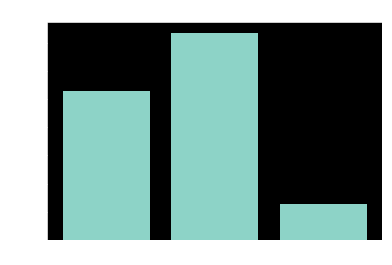

height_brick    132
height_plate    184
height_other     32
dtype: int64


In [72]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14,10)
%matplotlib inline


col_list = [ col for col in exp_df.columns.values if ('height' in col) ]
title    = 'Height category distribution'

y_pos = np.arange(len(col_list))
performance = exp_df[col_list].sum()
 
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, col_list)

plt.ylabel('n')
plt.title(title)
 
plt.show()

print performance

#exp_df[col_list].sum().plot.hist()
#plt.show()

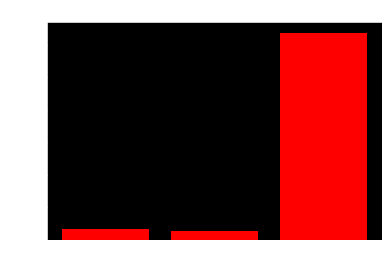

shape_corner     16
shape_round      14
shape_square    318
dtype: int64


In [73]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14,10)
%matplotlib inline


col_list = [ col for col in exp_df.columns.values if ('shape' in col) ]
title    = 'Shape category distribution'

y_pos = np.arange(len(col_list))
performance = exp_df[col_list].sum()
 
plt.bar(y_pos, performance, align='center', color='r')
plt.xticks(y_pos, col_list)

plt.ylabel('n')
plt.title(title)
 
plt.show()

print performance

#exp_df[col_list].sum().plot.hist()
#plt.show()

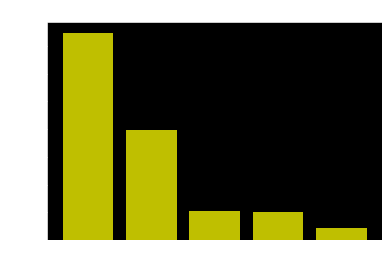

short_1    187
short_2     99
short_4     26
short_6     25
short_8     11
dtype: int64


In [74]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14,10)
%matplotlib inline


col_list = [ col for col in exp_df.columns.values if ('short' in col) ]
title    = 'Short category distribution'

y_pos = np.arange(len(col_list))
performance = exp_df[col_list].sum()
 
plt.bar(y_pos, performance, align='center', color='y')
plt.xticks(y_pos, col_list)

plt.ylabel('n')
plt.title(title)
 
plt.show()

print performance

#exp_df[col_list].sum().plot.hist()
#plt.show()

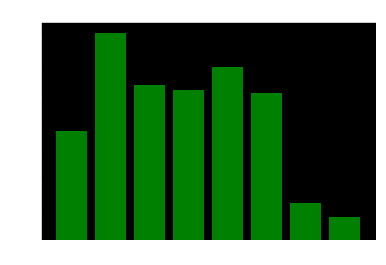

long_1     38
long_2     72
long_3     54
long_4     52
long_6     60
long_8     51
long_10    13
long_12     8
dtype: int64


In [75]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14,10)
%matplotlib inline


col_list = [ col for col in exp_df.columns.values if ('long' in col) ]
title    = 'Long category distribution'

y_pos = np.arange(len(col_list))
performance = exp_df[col_list].sum()
 
plt.bar(y_pos, performance, align='center', color='g')
plt.xticks(y_pos, col_list)

plt.ylabel('n')
plt.title(title)
 
plt.show()

print performance

#exp_df[col_list].sum().plot.hist()
#plt.show()

In [59]:
easy_labels = [ 
               'angular_brick_1x1', 'arch_1x3', 'brick_1x1', 'brick_1x2', 'brick_1x3', 'brick_1x4', 'brick_1x6', 'brick_1x8', 
               'brick_2x2', 'brick_2x3', 'brick_2x4', 'brick_2x6', 'plate_1x1', 'plate_1x10', 'plate_1x2', 'plate_1x3', 'plate_1x4', 
               'plate_1x6', 'plate_1x8', 'plate_2x12', 'plate_2x2', 'plate_2x3', 'plate_2x4', 'plate_2x6', 'plate_2x8', 'plate_4x4', 
               'plate_4x6', 'plate_4x8', 'plate_6x10', 'plate_6x6', 'plate_6x8', 'plate_8x8',
              ]

hard_label_dict = {
                     'arch_1x6x2':6,'brick_2x2_round':2,'brick_corner_1x2x2':2,'corner_brick_2x2_45_outside':2,
                     'corner_plate_1x2x2':2,'plate_1x1_round':1,'plate_1x1_w_clip_vertical':1,'plate_1x2_w_1_knob':2,
                     'roof_tile_1x2_45':2,'roof_tile_1x2_inv':2,'roof_tile_1x3_25':3,'roof_tile_1x3_25_inv':3,'roof_tile_2x2_45':2,
                     'radiator_grille_1x2':2,'round_brick_1x1':1,'technic_brick_1x1_w_hole':1,'technic_brick_1x2_w_hole':2,
                  }